# Player Efficiency Rating for MMORPGS

In this notebook I try to develop a PER (Player efficiency rating) for an mmo. In this excercise I take into account that efficiency has a different meaning for each role of the trinity and I tackle the challenge of developing a single metric to evaluate the impact of a player in a Boss Fight.

In this notebook I'll use the data of [Complexity Limit]() when they achived world first at [Castle Nathria]() in [World of Warcraft - Shadowlands]()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#The dataset correspond to the Council of Blood Fight. 

df = pd.read_csv('WL_COMPLEXITY.csv')
df.tail(10)

,Name,Role,Subrole,TimeAlive,Mitigated,Ilvl,DTPS,HPS,DPS,Count
10,Ericjunior,DPS,RANGED,503.0,0.1372,227,1663.3,41.2,4813.3,5.0
11,Lipdk,DPS,MELEE,503.0,0.1603,229,1743.6,251.0,4760.1,4.0
12,Kíngflydk,DPS,MELEE,503.0,0.1164,229,1732.5,126.9,4723.7,2.0
13,Dharkee,TANK,TANK,503.0,0.5501,228,4588.5,1617.6,3242.3,0.0
14,Scottm,TANK,TANK,503.0,0.5859,227,5724.3,1975.3,2941.3,0.0
15,Truckboy,DPS,MELEE,35.0,0.2531,228,443.8,225.2,2394.0,0.0
16,Driney,HEALER,HEALER,503.0,0.1602,229,1512.3,8289.7,1586.6,0.0
17,Maeveycakes,HEALER,HEALER,503.0,0.1287,229,1688.7,8736.8,422.9,6.0
18,Fearrshaman,HEALER,HEALER,503.0,0.1478,227,1630.9,7685.7,59.7,0.0
19,Åsúnå,HEALER,HEALER,35.0,0.0677,220,1907.6,5168.7,0.0,0.0


This dataset has the minimum information of a fight. Let me explain a little bit the columns:

- **Name:** Name of the player
- **Role:** Role in the trinity (TANK, DPS, HEALER)
- **Subrole:** For DPS a classification between MELEE and RANGED
- **TimeAlive:** Time alive in the fight. In seconds
- **Mitigated:** Percentage of damage recieved that was mitigated.
- **ILvl:** The gear level the player was using.
- **DTPS:** Damage Taken per Second
- **HPS:** Healing per Second
- **DPS:** Damage per Second
- **Count:** Count of interactions with the fight. In this dataset only the interrupts were recount.


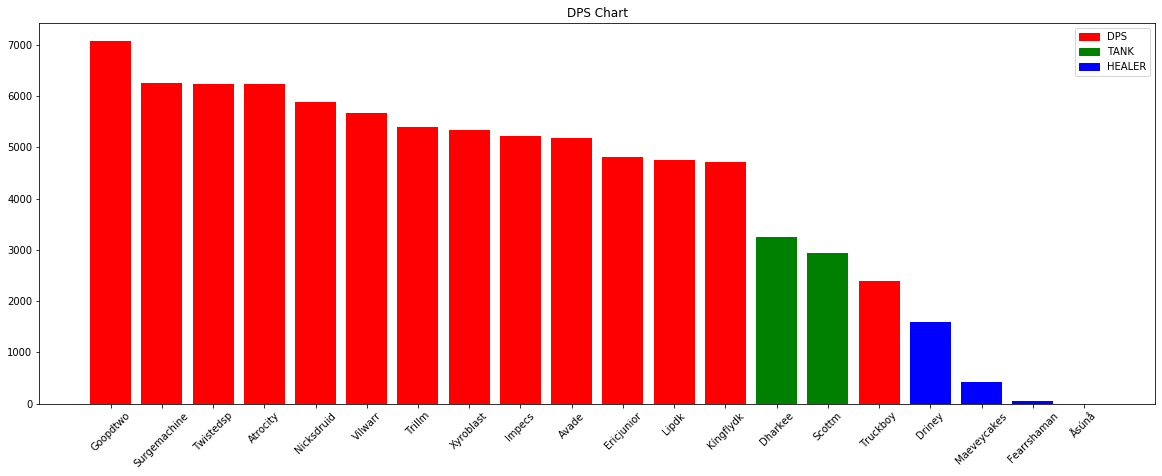

In [4]:
#Lets see the DPS performance of the team in this fight

fig, ax1 = plt.subplots(figsize=(20, 7)) 
fig.canvas.manager.set_window_title('DPS Chart')
ax1.set_title("DPS Chart")


colors = {'DPS':'red', 'TANK':'green', 'HEALER':'blue'}           
c = df['Role'].apply(lambda x: colors[x])
ax1.bar(df["Name"], df["DPS"], color=c )


labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.xticks(rotation=45) 
plt.show()

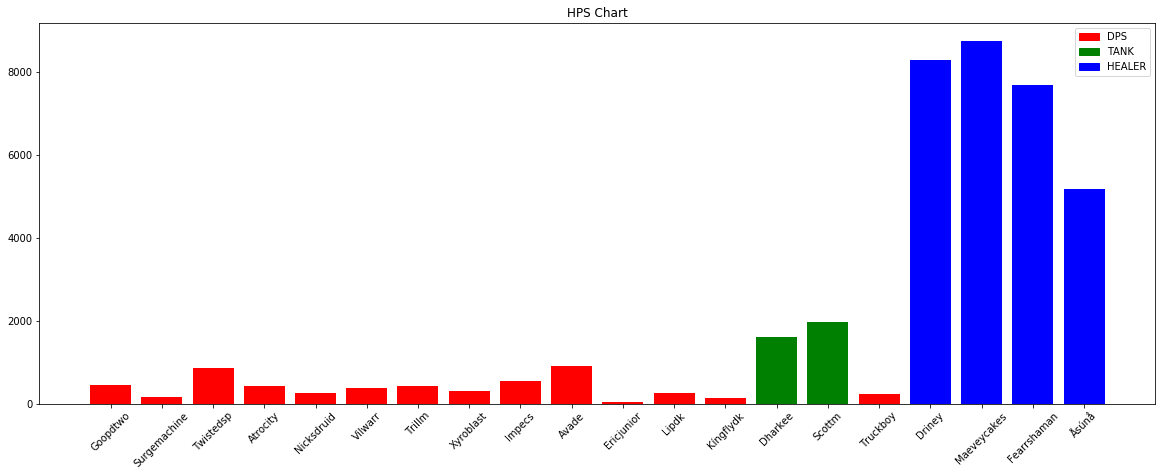

In [5]:
#Lets see the HPS performance of the team in this fight

fig, ax1 = plt.subplots(figsize=(20, 7)) 
fig.canvas.manager.set_window_title('HPS Chart')
ax1.set_title("HPS Chart")


colors = {'DPS':'red', 'TANK':'green', 'HEALER':'blue'}           
c = df['Role'].apply(lambda x: colors[x])
ax1.bar(df["Name"], df["HPS"], color=c )


labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.xticks(rotation=45) 
plt.show()

We know that there are many "Hybrid" classes in MMOs, like druids, paladins, monks, priets, in WoW. These classes are designed to play several roles to a certain degree, thats why some DPS can heal themselves or others. There are many MMOS trying to blur the line dividing roles in a class, for example the anticipated Ashes of Creation combining archetipes propose a posibility of many Hybrid or Enhaced Classes.

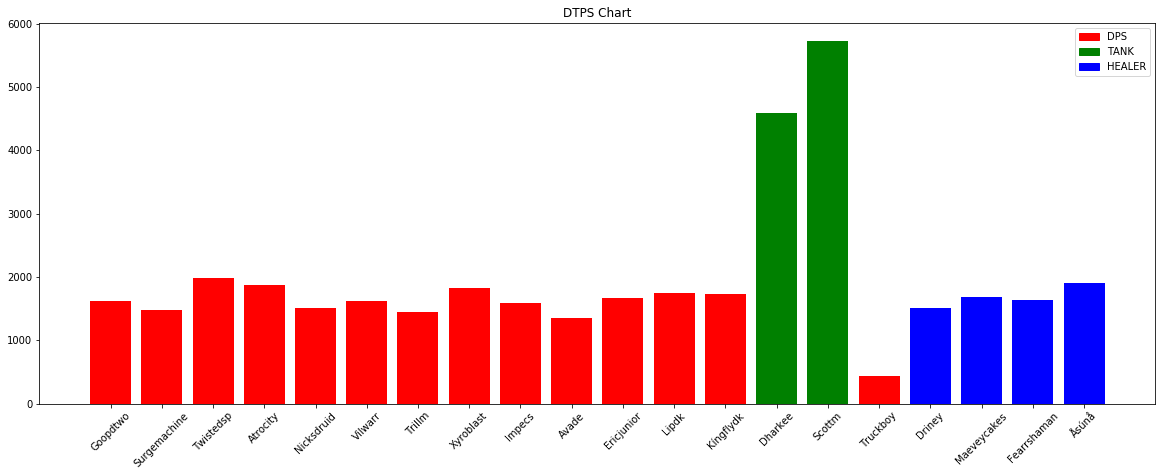

In [6]:
#Lets see the DTPS performance of the team in this fight

fig, ax1 = plt.subplots(figsize=(20, 7)) 
fig.canvas.manager.set_window_title('DTPS Chart')
ax1.set_title("DTPS Chart")


colors = {'DPS':'red', 'TANK':'green', 'HEALER':'blue'}           
c = df['Role'].apply(lambda x: colors[x])
ax1.bar(df["Name"], df["DTPS"], color=c )


labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.xticks(rotation=45) 
plt.show()

Obviously the tanks recieve more damage in a fight than anyone else. For this metric we can conclude that recieving too much damage is negative for everyone except for the tanks (As this is their main role, soakin up damage).


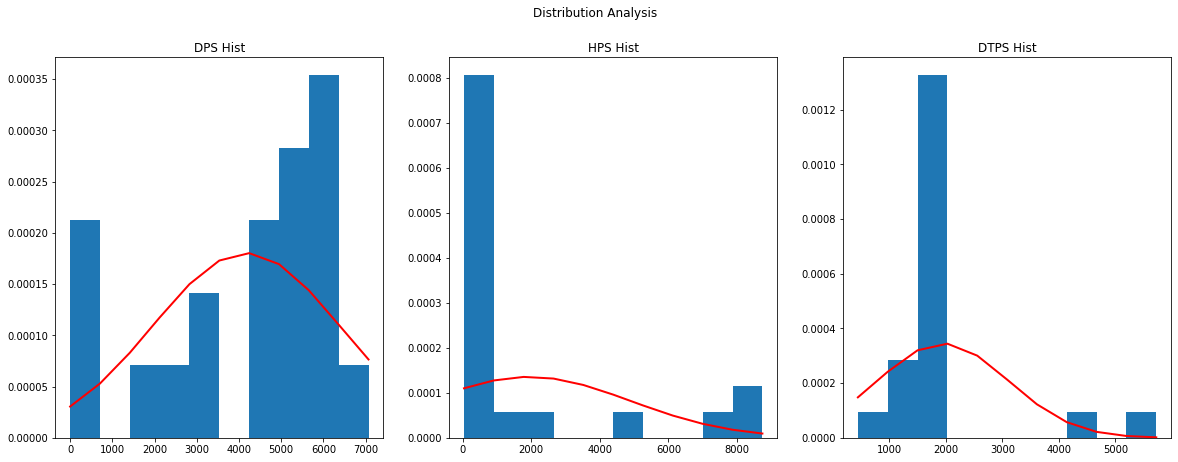

In [19]:
# Lets see the distribution of the key metrics

fig, axs = plt.subplots(1, 3, figsize=(20, 7))
fig.suptitle('Distribution Analysis')
roles = ["DPS", "HPS", "DTPS"]

for i, r in enumerate(roles):
    ax = axs[i]
    mu, sigma = df[r].mean(), df[r].std() # mean and standard deviation

    count, bins, ignored = ax.hist(df[r], 10, density=True)
    ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
    linewidth=2, color='r')
    ax.set_title(f"{r} Hist")

plt.show()

In [3]:
df_2 = df.copy()
df_2.describe()

,TimeAlive,Mitigated,Ilvl,DTPS,HPS,DPS,Count
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,454.750000,0.218985,227.350000,1948.165000,1942.005000,4171.675000,1.500000
std,143.697004,0.140158,2.158825,1156.079539,2945.137573,2213.277796,2.236068
min,35.000000,0.067700,220.000000,443.800000,41.200000,0.000000,0.000000
25%,503.000000,0.128550,227.000000,1512.975000,256.700000,2804.475000,0.000000
50%,503.000000,0.160250,228.000000,1647.100000,442.750000,5001.050000,0.000000
75%,503.000000,0.260700,229.000000,1842.500000,1707.025000,5722.200000,3.250000
max,503.000000,0.585900,229.000000,5724.300000,8736.800000,7070.600000,6.000000


In [4]:
INTERCEPT = 25
SCALE = 75

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

df_2[['HPS', 'DPS', 'DTPS', 'Count', 'Mitigated', 'TimeAlive']] = sc.fit_transform( df_2[['HPS', 'DPS', 'DTPS', 'Count','Mitigated', 'TimeAlive']] )
df_2.tail(10)

,Name,Role,Subrole,TimeAlive,Mitigated,Ilvl,DTPS,HPS,DPS,Count
10,Ericjunior,DPS,RANGED,1.0,0.134118,227,0.230944,0.000000,0.680748,0.833333
11,Lipdk,DPS,MELEE,1.0,0.178695,229,0.246151,0.024127,0.673224,0.666667
12,Kíngflydk,DPS,MELEE,1.0,0.093979,229,0.244049,0.009856,0.668076,0.333333
13,Dharkee,TANK,TANK,1.0,0.930915,228,0.784907,0.181287,0.458561,0.000000
14,Scottm,TANK,TANK,1.0,1.000000,227,1.000000,0.222423,0.415990,0.000000
15,Truckboy,DPS,MELEE,0.0,0.357777,228,0.000000,0.021160,0.338585,0.000000
16,Driney,HEALER,HEALER,1.0,0.178503,229,0.202348,0.948583,0.224394,0.000000
17,Maeveycakes,HEALER,HEALER,1.0,0.117715,229,0.235754,1.000000,0.059811,1.000000
18,Fearrshaman,HEALER,HEALER,1.0,0.154574,227,0.224808,0.879123,0.008443,0.000000
19,Åsúnå,HEALER,HEALER,0.0,0.000000,220,0.277209,0.589666,0.000000,0.000000


In [6]:

df_2[['HPS', 'DPS', 'Count', 'Mitigated', 'TimeAlive']] = df_2[['HPS', 'DPS', 'Count', 'Mitigated', 'TimeAlive']]*SCALE  + INTERCEPT
df_2['DTPS'] = ( 1 - df_2['DTPS'] ) * SCALE + INTERCEPT 
df_2.tail(10)

,Name,Role,Subrole,TimeAlive,Mitigated,Ilvl,DTPS,HPS,DPS,Count
10,Ericjunior,DPS,RANGED,100.0,35.058858,227,82.679197,25.000000,76.056134,87.5
11,Lipdk,DPS,MELEE,100.0,38.402161,229,81.538680,26.809536,75.491825,75.0
12,Kíngflydk,DPS,MELEE,100.0,32.048437,229,81.696336,25.739167,75.105719,50.0
13,Dharkee,TANK,TANK,100.0,94.818603,228,41.131995,38.596532,59.392060,25.0
14,Scottm,TANK,TANK,100.0,100.000000,227,25.000000,41.681713,56.199262,25.0
15,Truckboy,DPS,MELEE,25.0,51.833269,228,100.000000,26.587010,50.393885,25.0
16,Driney,HEALER,HEALER,100.0,38.387688,229,84.823880,96.143739,41.829548,25.0
17,Maeveycakes,HEALER,HEALER,100.0,33.828638,229,82.318436,100.000000,29.485829,100.0
18,Fearrshaman,HEALER,HEALER,100.0,36.593014,227,83.139381,90.934208,25.633256,25.0
19,Åsúnå,HEALER,HEALER,25.0,25.000000,220,79.209355,69.224953,25.000000,25.0


In [7]:
df_2.describe()

,TimeAlive,Mitigated,Ilvl,DTPS,HPS,DPS,Count
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,92.267628,46.895745,227.350000,78.633202,41.394541,69.250223,43.75000
std,23.028366,20.285350,2.158825,16.420029,25.401964,23.476909,27.95085
min,25.000000,25.000000,220.000000,25.000000,25.000000,25.000000,25.00000
25%,100.000000,33.806928,227.000000,80.133984,26.858699,54.747917,25.00000
50%,100.000000,38.394925,228.000000,82.909289,28.463390,78.047655,25.00000
75%,100.000000,52.933230,229.000000,84.814293,39.367827,85.697112,65.62500
max,100.000000,100.000000,229.000000,100.000000,100.000000,100.000000,100.00000


In [8]:
def per_raw(val, p = 0.3, i = 0.1):
    """
    Calculate the Player efficiency Rating 
     - p*(DPS + HPS + (DTPS + TimeAlive)/2) + i*Count
     - p Percentage of each Ouput statistics (DPS/HPS/SURV)
     - i Percentage of tje incidence in the fight (Interrupts, Accionables)
    """
    try:
        
        if val['Role'] == 'TANK' :
            output = ( val['DPS'] + val['HPS'] + (val['Mitigated'] + val['TimeAlive'])/2 ) * p
        else:
            output = ( val['DPS'] + val['HPS'] + (val['DTPS'] + val['TimeAlive'])/2 ) * p
        
        per = val['Count']*i + output
        
    except:
        per = 0
    return per

In [9]:
df_2['PER_RAW'] = df_2.apply(per_raw, axis=1)
df_2.tail(10)

,Name,Role,Subrole,TimeAlive,Mitigated,Ilvl,DTPS,HPS,DPS,Count,PER_RAW
10,Ericjunior,DPS,RANGED,100.0,35.058858,227,82.679197,25.000000,76.056134,87.5,66.468720
11,Lipdk,DPS,MELEE,100.0,38.402161,229,81.538680,26.809536,75.491825,75.0,65.421210
12,Kíngflydk,DPS,MELEE,100.0,32.048437,229,81.696336,25.739167,75.105719,50.0,62.507916
13,Dharkee,TANK,TANK,100.0,94.818603,228,41.131995,38.596532,59.392060,25.0,61.119368
14,Scottm,TANK,TANK,100.0,100.000000,227,25.000000,41.681713,56.199262,25.0,61.864292
15,Truckboy,DPS,MELEE,25.0,51.833269,228,100.000000,26.587010,50.393885,25.0,44.344268
16,Driney,HEALER,HEALER,100.0,38.387688,229,84.823880,96.143739,41.829548,25.0,71.615568
17,Maeveycakes,HEALER,HEALER,100.0,33.828638,229,82.318436,100.000000,29.485829,100.0,76.193514
18,Fearrshaman,HEALER,HEALER,100.0,36.593014,227,83.139381,90.934208,25.633256,25.0,64.941146
19,Åsúnå,HEALER,HEALER,25.0,25.000000,220,79.209355,69.224953,25.000000,25.0,46.398889


In [10]:
df_2.describe()

,TimeAlive,Mitigated,Ilvl,DTPS,HPS,DPS,Count,PER_RAW
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000
mean,92.267628,46.895745,227.350000,78.633202,41.394541,69.250223,43.75000,64.168703
std,23.028366,20.285350,2.158825,16.420029,25.401964,23.476909,27.95085,7.372737
min,25.000000,25.000000,220.000000,25.000000,25.000000,25.000000,25.00000,44.344268
25%,100.000000,33.806928,227.000000,80.133984,26.858699,54.747917,25.00000,62.854375
50%,100.000000,38.394925,228.000000,82.909289,28.463390,78.047655,25.00000,65.338684
75%,100.000000,52.933230,229.000000,84.814293,39.367827,85.697112,65.62500,67.852385
max,100.000000,100.000000,229.000000,100.000000,100.000000,100.000000,100.00000,76.193514


In [11]:
df_3 = df.copy()

In [12]:

df_3['HPS'] = df_3.apply(lambda x: x['HPS'] /x['Ilvl'], axis=1)
df_3['DPS'] = df_3.apply(lambda x: x['DPS'] /x['Ilvl'], axis=1)
df_3['DTPS'] = df_3.apply(lambda x: x['DTPS'] /x['Ilvl'], axis=1)
df_3['Mitigated'] = df_3.apply(lambda x: x['Mitigated'] /x['Ilvl'], axis=1)
df_3.tail(10)

,Name,Role,Subrole,TimeAlive,Mitigated,Ilvl,DTPS,HPS,DPS,Count
10,Ericjunior,DPS,RANGED,503.0,0.000604,227,7.327313,0.181498,21.203965,5.0
11,Lipdk,DPS,MELEE,503.0,0.000700,229,7.613974,1.096070,20.786463,4.0
12,Kíngflydk,DPS,MELEE,503.0,0.000508,229,7.565502,0.554148,20.627511,2.0
13,Dharkee,TANK,TANK,503.0,0.002413,228,20.125000,7.094737,14.220614,0.0
14,Scottm,TANK,TANK,503.0,0.002581,227,25.217181,8.701762,12.957269,0.0
15,Truckboy,DPS,MELEE,35.0,0.001110,228,1.946491,0.987719,10.500000,0.0
16,Driney,HEALER,HEALER,503.0,0.000700,229,6.603930,36.199563,6.928384,0.0
17,Maeveycakes,HEALER,HEALER,503.0,0.000562,229,7.374236,38.151965,1.846725,6.0
18,Fearrshaman,HEALER,HEALER,503.0,0.000651,227,7.184581,33.857709,0.262996,0.0
19,Åsúnå,HEALER,HEALER,35.0,0.000308,220,8.670909,23.494091,0.000000,0.0


In [13]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

df_3[['HPS', 'DPS', 'DTPS', 'Count', 'Mitigated', 'TimeAlive']] = sc.fit_transform( df_3[['HPS', 'DPS', 'DTPS', 'Count','Mitigated', 'TimeAlive']] )
df_3.tail(10)

,Name,Role,Subrole,TimeAlive,Mitigated,Ilvl,DTPS,HPS,DPS,Count
10,Ericjunior,DPS,RANGED,1.0,0.130504,227,0.231227,0.000000,0.680748,0.833333
11,Lipdk,DPS,MELEE,1.0,0.172554,229,0.243546,0.024086,0.667345,0.666667
12,Kíngflydk,DPS,MELEE,1.0,0.088227,229,0.241463,0.009814,0.662242,0.333333
13,Dharkee,TANK,TANK,1.0,0.925951,228,0.781176,0.182069,0.456550,0.000000
14,Scottm,TANK,TANK,1.0,1.000000,227,1.000000,0.224392,0.415990,0.000000
15,Truckboy,DPS,MELEE,0.0,0.352945,228,0.000000,0.021233,0.337100,0.000000
16,Driney,HEALER,HEALER,1.0,0.172362,229,0.200142,0.948581,0.222434,0.000000
17,Maeveycakes,HEALER,HEALER,1.0,0.111854,229,0.233244,1.000000,0.059289,1.000000
18,Fearrshaman,HEALER,HEALER,1.0,0.151045,227,0.225094,0.886905,0.008443,0.000000
19,Åsúnå,HEALER,HEALER,0.0,0.000000,220,0.288965,0.613966,0.000000,0.000000


In [14]:
df_3[['HPS', 'DPS', 'Count', 'Mitigated', 'TimeAlive']] = df_3[['HPS', 'DPS', 'Count', 'Mitigated', 'TimeAlive']]*SCALE  + INTERCEPT
df_3['DTPS'] = ( 1 - df_3['DTPS'] ) * SCALE + INTERCEPT 
df_3.tail(10)

,Name,Role,Subrole,TimeAlive,Mitigated,Ilvl,DTPS,HPS,DPS,Count
10,Ericjunior,DPS,RANGED,100.0,34.787779,227,82.657943,25.000000,76.056134,87.5
11,Lipdk,DPS,MELEE,100.0,37.941568,229,81.734052,26.806480,75.050849,75.0
12,Kíngflydk,DPS,MELEE,100.0,31.617044,229,81.890273,25.736067,74.668115,50.0
13,Dharkee,TANK,TANK,100.0,94.446320,228,41.411785,38.655163,59.241218,25.0
14,Scottm,TANK,TANK,100.0,100.000000,227,25.000000,41.829391,56.199262,25.0
15,Truckboy,DPS,MELEE,25.0,51.470875,228,100.000000,26.592464,50.282508,25.0
16,Driney,HEALER,HEALER,100.0,37.927161,229,84.989361,96.143578,41.682565,25.0
17,Maeveycakes,HEALER,HEALER,100.0,33.389063,229,82.506713,100.000000,29.446651,100.0
18,Fearrshaman,HEALER,HEALER,100.0,36.328339,227,83.117957,91.517903,25.633256,25.0
19,Åsúnå,HEALER,HEALER,25.0,25.000000,220,78.327615,71.047484,25.000000,25.0


In [15]:
df_3['PER_ILVL'] = df_3.apply(per_raw, axis=1)
df_3.tail(10)

,Name,Role,Subrole,TimeAlive,Mitigated,Ilvl,DTPS,HPS,DPS,Count,PER_ILVL
10,Ericjunior,DPS,RANGED,100.0,34.787779,227,82.657943,25.000000,76.056134,87.5,66.465532
11,Lipdk,DPS,MELEE,100.0,37.941568,229,81.734052,26.806480,75.050849,75.0,65.317307
12,Kíngflydk,DPS,MELEE,100.0,31.617044,229,81.890273,25.736067,74.668115,50.0,62.404796
13,Dharkee,TANK,TANK,100.0,94.446320,228,41.411785,38.655163,59.241218,25.0,61.035862
14,Scottm,TANK,TANK,100.0,100.000000,227,25.000000,41.829391,56.199262,25.0,61.908596
15,Truckboy,DPS,MELEE,25.0,51.470875,228,100.000000,26.592464,50.282508,25.0,44.312492
16,Driney,HEALER,HEALER,100.0,37.927161,229,84.989361,96.143578,41.682565,25.0,71.596247
17,Maeveycakes,HEALER,HEALER,100.0,33.389063,229,82.506713,100.000000,29.446651,100.0,76.210002
18,Fearrshaman,HEALER,HEALER,100.0,36.328339,227,83.117957,91.517903,25.633256,25.0,65.113041
19,Åsúnå,HEALER,HEALER,25.0,25.000000,220,78.327615,71.047484,25.000000,25.0,46.813387


In [16]:
df_2['PER_ILVL'] = df_3['PER_ILVL']

In [17]:
df_2.describe()

,TimeAlive,Mitigated,Ilvl,DTPS,HPS,DPS,Count,PER_RAW,PER_ILVL
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,92.267628,46.895745,227.350000,78.633202,41.394541,69.250223,43.75000,64.168703,64.173651
std,23.028366,20.285350,2.158825,16.420029,25.401964,23.476909,27.95085,7.372737,7.324744
min,25.000000,25.000000,220.000000,25.000000,25.000000,25.000000,25.00000,44.344268,44.312492
25%,100.000000,33.806928,227.000000,80.133984,26.858699,54.747917,25.00000,62.854375,62.738960
50%,100.000000,38.394925,228.000000,82.909289,28.463390,78.047655,25.00000,65.338684,65.215700
75%,100.000000,52.933230,229.000000,84.814293,39.367827,85.697112,65.62500,67.852385,67.769800
max,100.000000,100.000000,229.000000,100.000000,100.000000,100.000000,100.00000,76.193514,76.210002


In [18]:
df_2.tail(20)

,Name,Role,Subrole,TimeAlive,Mitigated,Ilvl,DTPS,HPS,DPS,Count,PER_RAW,PER_ILVL
0,Goopdtwo,DPS,RANGED,100.000000,47.259745,227,83.321182,28.532821,100.000000,25.0,68.558024,68.564183
1,Surgemachine,DPS,RANGED,100.000000,44.408530,227,85.285484,26.095382,91.309436,25.0,65.514268,65.513845
2,Twistedsp,DPS,RANGED,100.000000,33.741799,227,78.024808,32.049255,91.238367,25.0,66.190008,66.205799
3,Atrocity,DPS,RANGED,100.000000,28.864338,229,79.635451,28.314607,91.054861,25.0,65.256158,65.114094
4,Nicksdruid,DPS,RANGED,95.352564,47.115014,224,84.811097,26.875086,87.520507,25.0,63.843227,64.061980
5,Vilwarr,DPS,MELEE,100.000000,60.661907,229,83.380835,27.898017,85.089313,62.5,67.653325,67.521774
6,Trillm,DPS,MELEE,100.000000,56.233115,228,85.755610,28.393958,82.197763,25.0,63.540858,63.479789
7,Xyroblast,DPS,RANGED,100.000000,31.411617,226,80.300161,27.260626,81.587843,87.5,68.449565,68.513879
8,Impecs,DPS,MELEE,100.000000,37.721922,229,83.615188,29.378939,80.379671,25.0,62.969861,62.850349
9,Avade,DPS,MELEE,100.000000,64.526245,228,86.996970,32.375282,80.039176,87.5,70.523883,70.470059
